<H1> KIPA PROJECT </H1>
<H3> MDSSB-DSAI-01 DIGITAL TRANSFORMATION </H3>
Aiman Alam | Modou Lamin Manjang | Husnain Dawood | Niloufar Shokri | Sergey Polyarus | Suraj Karakulath

## Objective <a class="anchor" id="Objective"></a>


We want to find correlations/patterns between the price of waste (bought from suppliers) and various potential price determinants such as weather, energy, business cycle and construction.

In [65]:
#Importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
from statsmodels.tsa.tsatools import lagmat

<a id="#Data-Import-and-Quick-Exploration"></a>

## Data Import and Quick Exploration



In [66]:
#Pricing dataset 
df = pd.read_excel('df.xlsx')
#df.head()

In [67]:
#df.info()

There are no null values in any of the 3379 observations.

In [68]:
#len(df['Plz'].unique())

There are 10 unique clusters.

In [69]:
#df['full'].unique()

And 4 unique product categories.

We explore a few clusters by splitting among ourselves. To start with, we split as:

- Nilou: ['25', '24']", "['26', '27', '28']", "['20', '21', '22', '23']
- Aiman: "['29', '30', '31', '38', '39']
- Suraj: "['10', '11', '12', '13', '14', '15', '16']", "['48', '49']
- Momo: "['1', '4', '6', '7', '8', '9']

### Cluster '25','24'

Looking at the **['25','24'] ** cluster for the **product category 'A2 -  geschreddert'** first.

In [70]:
TS1 = df[(df['Plz'] == "['25', '24']")]
#TS1.head()

In [71]:
fig = px.line(TS1, x='date', y='wPreis', color='full', title='Weekly Prices for [25,24] by Category')
fig.show()

It is interesting to note that the wPreis for all 3 categories in the same cluster are somewhat correlated, with occasional deviations. This need not be so but the fact that it is happens to be a non-trivial insight.

### Cluster '26', '27', '28'

In [72]:
TS2 = df[(df['Plz'] == "['26', '27', '28']")]
#TS2.tail()

In [73]:
fig = px.line(TS2, x='date', y='wPreis', color='full', title='Weekly Prices for [26,27,28] by Category')
fig.show()

### Cluster '20', '21', '22', '23'

In [74]:
TS3 = df[(df['Plz'] == "['20', '21', '22', '23']")]

fig = px.line(TS3, x='date', y='wPreis', color='full', title='Weekly Prices for [20,21,22,23] by Product Category')
fig.show()

In [75]:
TS5 = df[(df['Plz'] == "['48', '49']")]  
fig = px.line(TS5, x='date', y='wPreis', color='full', title='Weekly Prices for [48, 49] by Category')
fig.show()

### Cluster '1', '4', '6', '7', '8', '9'

In [76]:
TS7 = df[(df['Plz'] == "['1', '4', '6', '7', '8', '9']")]  
#TS7.head()


In [77]:
fig = px.line(TS7, x='date', y='wPreis', color='full', title='Weekly Prices for [1, 4, 6, 7, 8, 9] by Category')
fig.show()

Interestingly for 7th cluster, [1, 4, 6, 7, 8, 9] just like the forth cluster, there is only one waste category, *A1 & A2*


### Cluster '40', '41', '42', '44', '45', '46', '47'

In [78]:
TS8 = df[(df['Plz'] == "['40', '41', '42', '44', '45', '46', '47']")]  
#TS8.head()


In [79]:
fig = px.line(TS8, x='date', y='wPreis', color='full', title='Weekly Prices for [40, 41, 42, 44, 45 46, 47] by Category')
fig.show()

As before, the wPreis of categories in the same cluster follow a similar series, almost identical.

## Exploring Potential Price Determinants 


### 1. Energy 

####  1.a. Oil

- We do not have access to any data that has oil prices per region in Germany (it may not make sense either)
- So we look at Global Oil and Gas Market Prices as a proxy from Yahoo finance https://finance.yahoo.com/quote/CL%3DF/history?period1=1599436800&period2=1694649600&interval=1wk&filter=history&frequency=1wk&includeAdjustedClose=true   (No download option but can copy and paste into excel)
- And *assume that relative changes in global prices have a proportional impact on the same prices in Germany*

In [80]:
#Oil
oil = pd.read_excel('Crude_oil.xlsx')
#oil.head() 

When exploring correlations between weekly oil prices and the price of another commodity like waste, the "Close" or "Adj Close" price is often used.

**Close Price**: The "Close" price represents the closing price of the commodity for a specific trading day. It is the last price at which a trade occurred before the market closed for that day. This is a commonly used price metric for historical price analysis.

**Adjusted Close Price (Adj Close)**: The "Adj Close" price accounts for events such as stock splits and dividend payments. It is often considered more accurate for long-term analysis because it adjusts for corporate actions that can affect the price. In the context of Crude Oil, if there are similar adjustments, the "Adj Close" can be a better choice for long-term correlations.

In [81]:
#oil.info()

158 entries for each week and no null values.

Transformation: Date here is in an object format so we convert it to datetime64[ns]

In [82]:
oil["Date"] = pd.to_datetime(oil["Date"])

In [83]:
oil.sort_values(by='Date')

,Date,Open,High,Low,Close*,Adj Close**,Volume
157,2020-09-07,39.48,39.59,36.13,37.33,37.33,"1,907,673"
156,2020-09-14,37.32,41.49,36.82,41.11,41.11,"1,430,611"
155,2020-09-21,40.98,41.27,38.66,40.25,40.25,"1,171,773"
154,2020-09-28,40.07,40.80,36.63,37.05,37.05,"1,781,188"
153,2020-10-05,37.00,41.47,37.00,40.60,40.60,"1,953,665"
...,...,...,...,...,...,...,...
4,2023-08-14,83.09,83.20,78.95,81.25,81.25,"1,269,633"
3,2023-08-21,81.43,82.47,77.59,79.83,79.83,"1,542,148"
2,2023-08-28,80.15,86.06,79.34,85.55,85.55,"1,619,479"
1,2023-09-04,86.06,88.08,85.02,87.51,87.51,"1,325,196"


#### Distribution of crude oil prices (Adj Close)

Quick look at the distribution of crude oil prices (Adj Close)

In [84]:
fig = px.line(oil, x='Date', y='Adj Close**', title='Weekly Adjusted Close Price for Crude Oil')
fig.show()

#### Correlation of Adj Close Price with the wPreis of only one of the clusters (48,49)

Now exploring the correlation of this Adjusted Close Price with the wPreis of **only one of the clusters (48,49):**
For this we combine the 2 dataframes (TS5 and oil) - INNER JOIN by the 'date' variable in TS5 and 'Date' variable in oil (which has been transformed)

In [85]:
combined_df = pd.merge(TS5[['date', 'wPreis', 'full']], oil[['Date', 'Adj Close**']], left_on='date', right_on='Date', how='inner')
# And drop the duplicate 'Date' column 
combined_df = combined_df.drop(columns='Date')
#combined_df


In [86]:
# Get unique categories
categories = combined_df['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

Some quick observations (purely from visualization):
- The wPreis and Adj Close price of Crude oil for both categories seem to be **closely correlated from Sep 2020 to around Jan 2022**. 
- For **Category A3 - geschreddert**, the correlation roughly continues *until June 2022* after which it becomes an **inverse correlation** until December 2022 and then low correlation until Sep 2023
- For **Category A2 & A3 - geschreddert**, the correlation continues from Jan 2022 to around March 2022 after which they slowly become inverse correlated until Dec 2022, and similar to the other category, loses the correlation after that.

Something remained consistent until Jan 2022. After that things began going in the opposite direction. And from Dec 2022 onwards they become less correlated.

To get a measure of the correlation, we calculate the correlation coefficients in a heatmap. They are 0.6 for A3 -  geschreddert category and 0.62 for A2 & A3 -  geschreddert which are above 0.5 and hence significant.

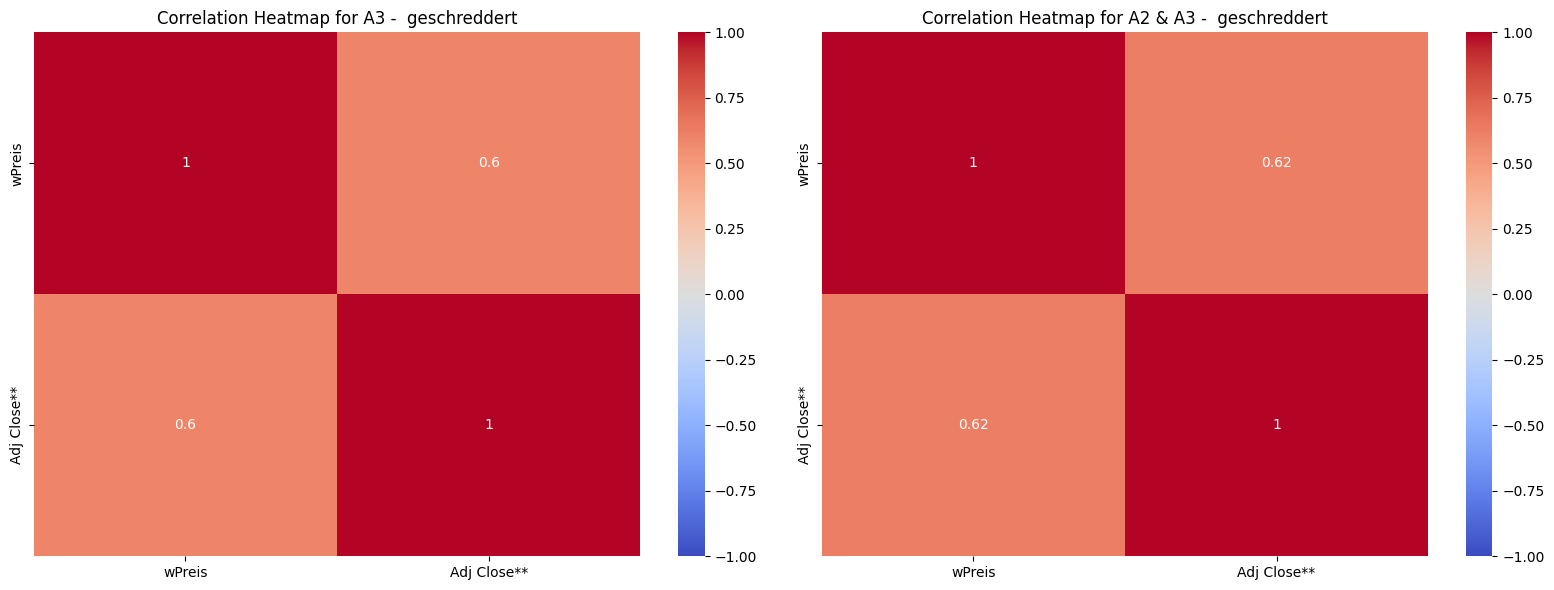

In [87]:
 # Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_df[combined_df['full'] == category]
    correlation_matrix = category_data[['wPreis', 'Adj Close**']].corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap for {category}')

# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

In [88]:
# Loop through each category and calculate the correlation values
correlation_values = []
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    correlation_matrix = category_data[['wPreis', 'Adj Close**']].corr()
    correlation_value = correlation_matrix.iloc[0, 1]  # Get the correlation value between 'wPreis' and 'Adj Close**'
    correlation_values.append((category, correlation_value))

# Print the correlation values
for category, correlation in correlation_values:
    print(f'Correlation for {category}: {correlation:.2f}')

Correlation for A3 -  geschreddert: 0.60
Correlation for A2 & A3 -  geschreddert: 0.62


#### Correlation for Oil with Lag
Start with 1-week lag

In [89]:
combined_df['wPreis_lagged_week'] = combined_df['wPreis'].shift(1)
#combined_df


In [90]:
# Get unique categories
categories = combined_df['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis_lagged_week'], mode='lines', name=f'wPreis_lagged_week ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison (wPreis_lagged_week) by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

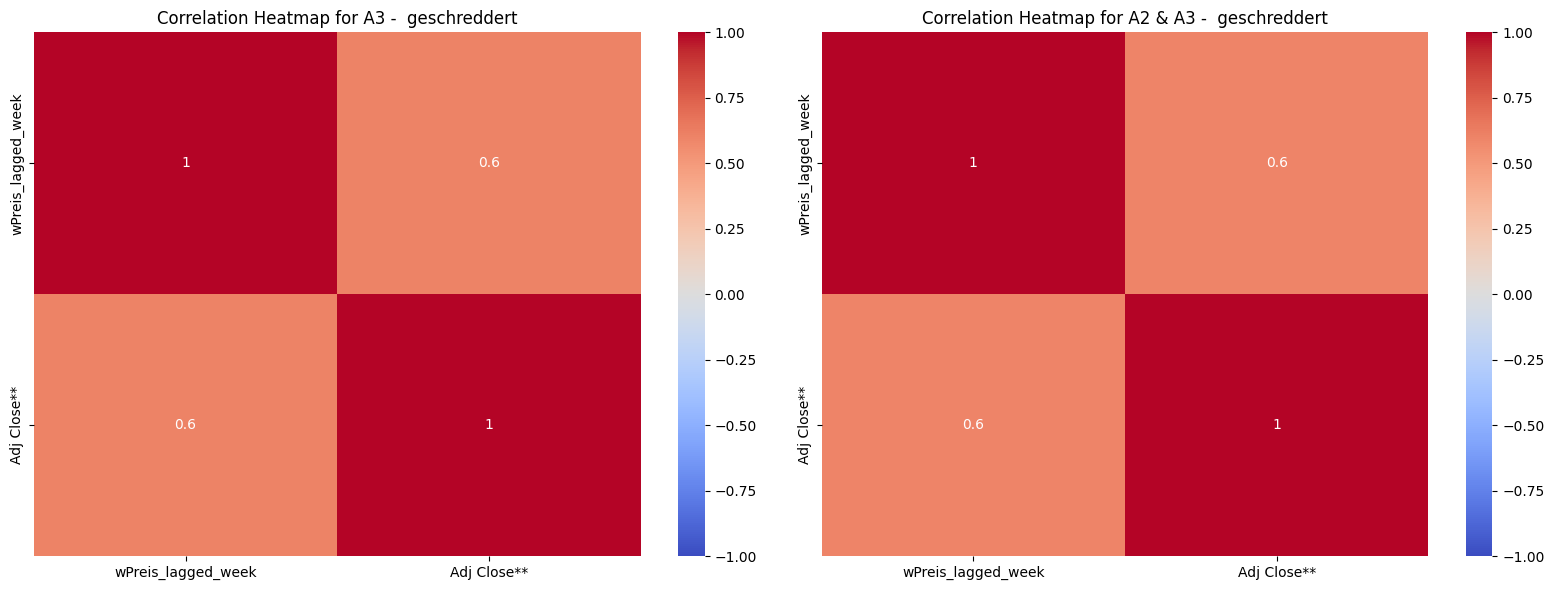

In [91]:
# Create a figure with heatmaps side by side
fig, axes = plt.subplots(1, len(categories), figsize=(16, 6))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_df[combined_df['full'] == category]
    
    # Create the correlation heatmap
    correlation_matrix = category_data[['wPreis_lagged_week', 'Adj Close**']].corr()
    ax_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    ax_heatmap.set_title(f'Correlation Heatmap for {category}')
    
# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

In [92]:
# Loop through each category and calculate the correlation values
correlation_values = []
for category in categories:
    category_data = combined_df[combined_df['full'] == category]
    correlation_matrix = category_data[['wPreis_lagged_week', 'Adj Close**']].corr()
    correlation_value = correlation_matrix.iloc[0, 1]  # Get the correlation value between 'wPreis' and 'Adj Close**'
    correlation_values.append((category, correlation_value))

# Print the correlation values
for category, correlation in correlation_values:
    print(f'Correlation for {category}: {correlation:.2f}')

Correlation for A3 -  geschreddert: 0.60
Correlation for A2 & A3 -  geschreddert: 0.60


Now for lags by a few more weeks:

In [93]:
# Define the range of lags
lags = range(2, 11)

# Create an empty DataFrame to store the results
lag_correlations = pd.DataFrame(columns=['Category', 'Lag', 'Correlation'])

# Loop through each category and lag and calculate the correlation
for category in categories:
    for lag in lags:
        category_data = combined_df[combined_df['full'] == category]
        
        # Calculate the lagged variable
        category_data['wPreis_lagged'] = category_data['wPreis'].shift(lag)
        
        # Calculate the correlation between wPreis_lagged and Adj Close**
        correlation = category_data['wPreis_lagged'].corr(category_data['Adj Close**'])
        
        # Append the result to the DataFrame
        lag_correlations = lag_correlations.append({'Category': category, 'Lag': lag, 'Correlation': correlation}, ignore_index=True)

# Display the correlation coefficients for each category and lag
print(lag_correlations)

                   Category Lag  Correlation
0        A3 -  geschreddert   2     0.570127
1        A3 -  geschreddert   3     0.551046
2        A3 -  geschreddert   4     0.529585
3        A3 -  geschreddert   5     0.514884
4        A3 -  geschreddert   6     0.503870
5        A3 -  geschreddert   7     0.480222
6        A3 -  geschreddert   8     0.454619
7        A3 -  geschreddert   9     0.439824
8        A3 -  geschreddert  10     0.420328
9   A2 & A3 -  geschreddert   2     0.590616
10  A2 & A3 -  geschreddert   3     0.577857
11  A2 & A3 -  geschreddert   4     0.564648
12  A2 & A3 -  geschreddert   5     0.552081
13  A2 & A3 -  geschreddert   6     0.544712
14  A2 & A3 -  geschreddert   7     0.524520
15  A2 & A3 -  geschreddert   8     0.501037
16  A2 & A3 -  geschreddert   9     0.487971
17  A2 & A3 -  geschreddert  10     0.467319


The time series for wPreis with a 1-week lag also doesn't show visually any different correlation. The coefficients have infact decreased slightly and continue to decrease with more lags.

#### 1.b. Electricity (TO BE REPLACED BY AIMEE'S ANALYSIS)

The data is *available only from 1 Jan 2021*. The spot market prices arise or are calculated from the hourly prices and quantities of all electricity exchanges. And values are for Germany not regional.

In [94]:
elec = pd.read_csv('electricity.csv', sep=';')
#elec.head() 

In [95]:
#elec.info()

There are 23351 entries and it makes sense as it is hourly data from Jan 1 2021 (24 hours x (2 years + 8 months + 21 days until Sep 21).

Quick visual exploration. For this, we need to convert Datum to date-time format.

In [96]:
elec["Datum"] = pd.to_datetime(elec["Datum"])

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_359/44262613.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



#### IMPORTANT: The values of Spotmarktpreis in ct/kWh are in German standard - i.e. comma as decimal. So these need to be converted into decimals.

In [97]:
# Replace commas with periods in the 'Spotmarktpreis in ct/kWh' column and Converting prices into float variables
elec['Spotmarktpreis in ct/kWh'] = elec['Spotmarktpreis in ct/kWh'].str.replace(',', '.').astype(float)
#elec.head()


In [98]:
#elec.tail()

Some cleaning and transformation needed to get a proper datetime variable from combining the date (Datum) and von (hour) variables.

In [99]:
# Convert 'Datum' and 'von' to datetime separately and then combine them
elec['von'] = pd.to_datetime(elec['von'], format='%H:%M')
#elec.head()

In [100]:
# # Extract the time part without the date component
elec['von'] = elec['von'].dt.strftime('%H:%M:%S')
#elec.head()

In [101]:
elec['combined_datetime'] = elec['Datum'] + pd.to_timedelta(elec['von'].astype(str))
#elec.head()

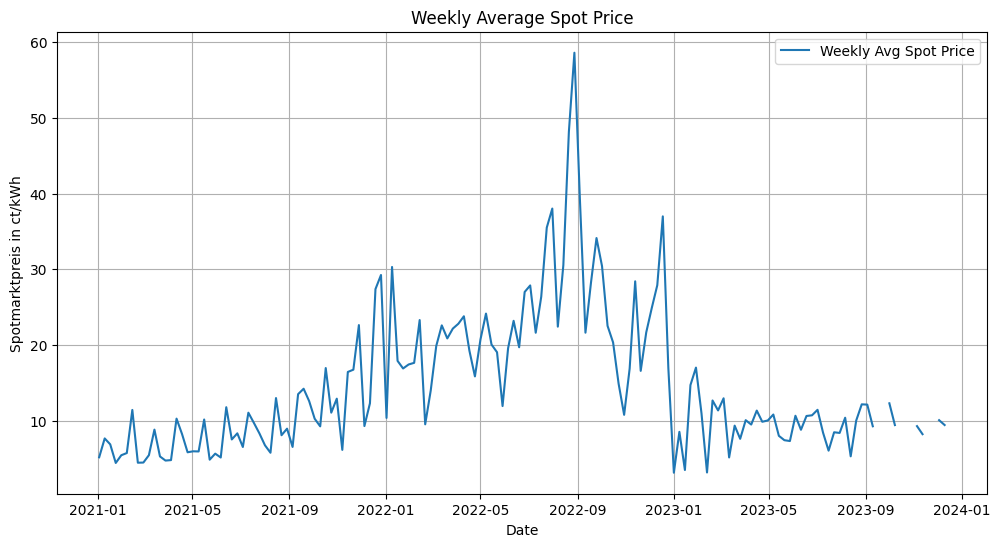

In [102]:
# Resample data to weekly averages
weekly_avg = elec.resample('W', on='combined_datetime').mean()

# Plot the weekly averages
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index, weekly_avg['Spotmarktpreis in ct/kWh'], label='Weekly Avg Spot Price')
plt.xlabel('Date')
plt.ylabel('Spotmarktpreis in ct/kWh')
plt.title('Weekly Average Spot Price')
plt.grid(True)
plt.legend()
plt.show()

#### Question: Why are there values for Spotmarktpreis in ct/kWh beyond today's date, such as into December? Are they forecasts?

In [103]:
weekly_avg.reset_index(inplace=True)


In [104]:
#weekly_avg

#### Correlation of Spotmarktpreis in ct/kWh with wPreis for the ['48', '49'] cluster

In [105]:
#TS5

New problem is that the weekly 'date' values in TS5 with the 14th of Sep and the combined_datetime values in weekly_avg may be starting with a different date. So we need a key that can be used to merge both, like the week number.

In [106]:
# Create a new column 'weekno' representing the week number
TS5['weekno'] = TS5['date'].dt.strftime('%U-%Y')  # Format: WeekNumber-Year
#TS5

In [107]:
#weekly_avg

In [108]:
# Create a new column 'weekno' representing the week number
weekly_avg['weekno'] = weekly_avg['combined_datetime'].dt.strftime('%U-%Y')  # Format: WeekNumber-Year
#weekly_avg

In [109]:
# Merge 'TS5' and 'elec' based on the 'week' column
combined_elect = pd.merge(TS5, weekly_avg, on='weekno', how='inner')
#combined_elect

In [110]:
combined_elect.drop(columns=['week','date','combined_datetime'], inplace=True)
combined_elect.sort_values(by='weekno')

,wPreis,Plz,full,weekno,Spotmarktpreis in ct/kWh
0,-30.855857,"['48', '49']",A3 - geschreddert,01-2021,5.187889
1,-28.406423,"['48', '49']",A3 - geschreddert,01-2021,5.187889
2,-30.855857,"['48', '49']",A2 & A3 - geschreddert,01-2021,5.187889
3,-28.406423,"['48', '49']",A2 & A3 - geschreddert,01-2021,5.187889
107,14.319133,"['48', '49']",A2 & A3 - geschreddert,01-2022,10.383893
...,...,...,...,...,...
204,72.442489,"['48', '49']",A3 - geschreddert,51-2022,36.989869
104,16.345424,"['48', '49']",A3 - geschreddert,52-2021,29.253595
105,13.879043,"['48', '49']",A2 & A3 - geschreddert,52-2021,29.253595
207,77.328708,"['48', '49']",A2 & A3 - geschreddert,52-2022,16.982190


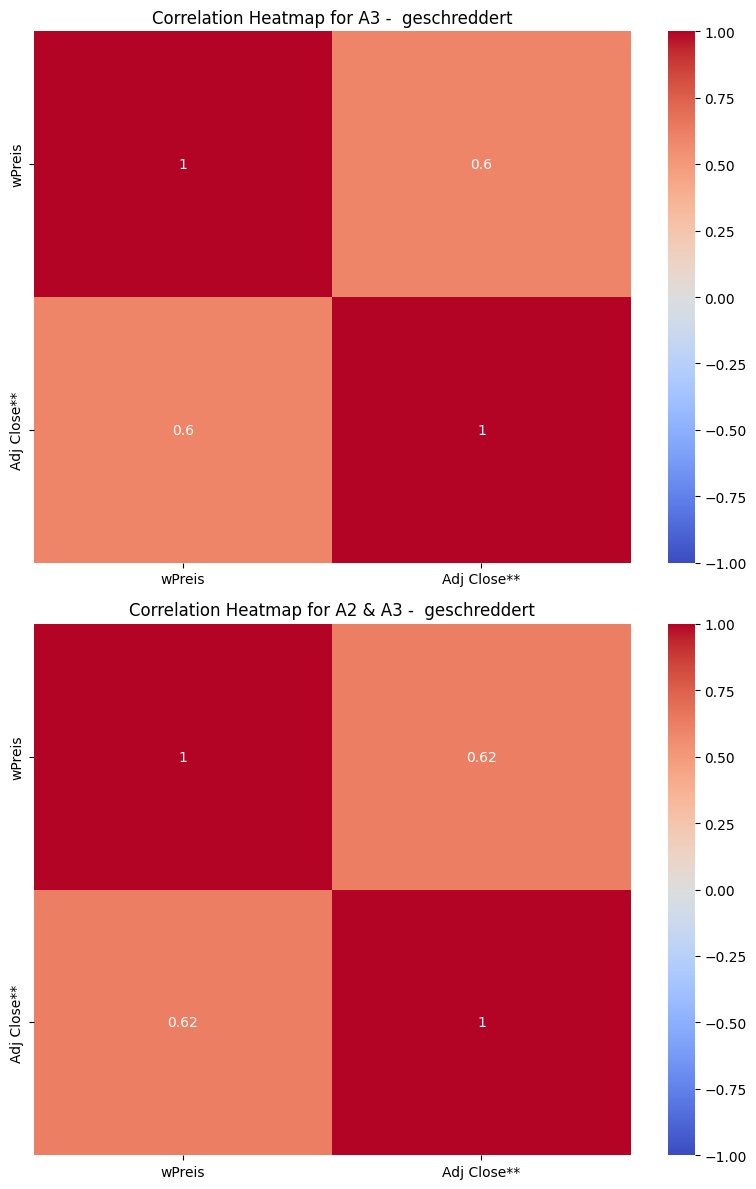

In [111]:
fig, axes = plt.subplots(len(categories), figsize=(8, 6 * len(categories)))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_df[combined_df['full'] == category]
    correlation_matrix = category_data[['wPreis', 'Adj Close**']].corr()
    
    ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    ax.set_title(f'Correlation Heatmap for {category}')
    
# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

#### Correlation with 1-week lag

In [112]:
combined_elect['wPreis_lagged_week'] = combined_elect['wPreis'].shift(1)

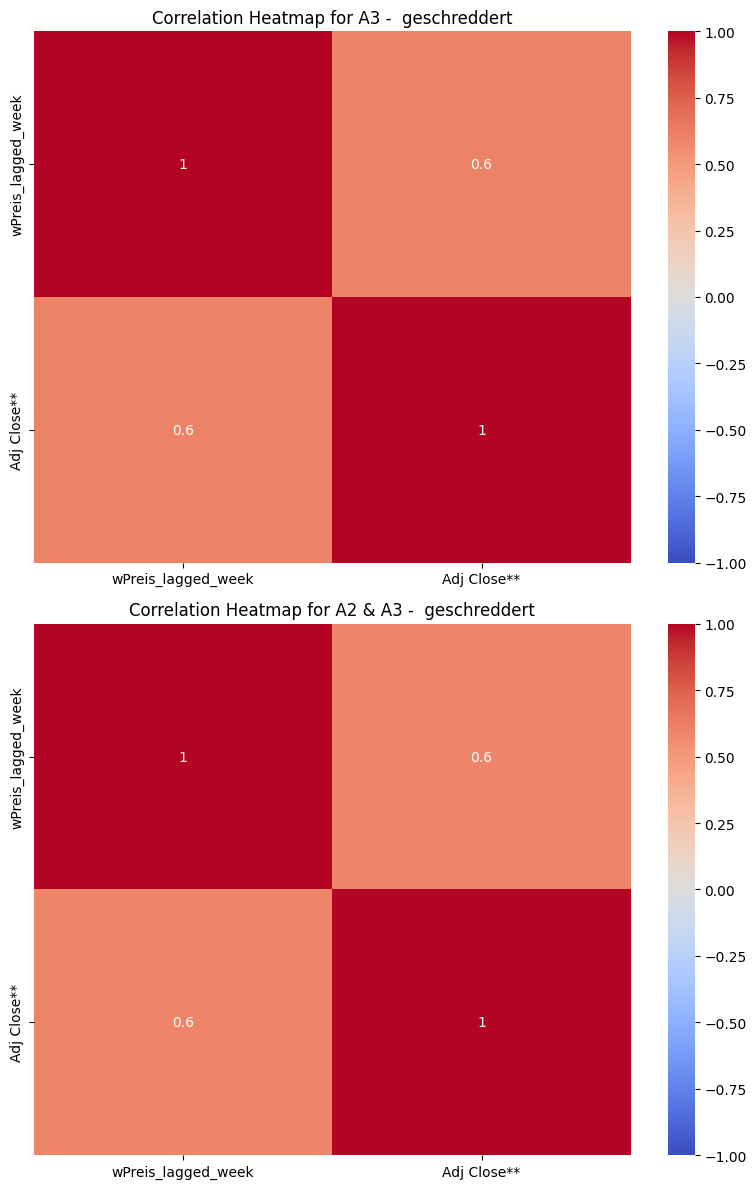

In [113]:
fig, axes = plt.subplots(len(categories), figsize=(8, 6 * len(categories)))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_df[combined_df['full'] == category]
    correlation_matrix = category_data[['wPreis_lagged_week', 'Adj Close**']].corr()
    
    ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    ax.set_title(f'Correlation Heatmap for {category}')
    
# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

Visually the time series looks like it is *more correlated* with the 1-week lag but the coefficients have fallen slightly.

#### 1.c. Gas

Similar to oil, gas prices have been collected from https://finance.yahoo.com/quote/NG%3DF/history?p=NG%3DF and they are for the whole of Germany.

In [114]:
gas = pd.read_excel('gas.xlsx')
#gas.head() 

In [115]:
gas["Date"] = pd.to_datetime(gas["Date"])

In [116]:
fig = px.line(gas, x='Date', y='Adj Close**', title='Weekly Adjusted Close Price for Natural Gas')
fig.show()

In [117]:
combined_gas = pd.merge(TS5[['date', 'wPreis', 'full']], gas[['Date', 'Adj Close**']], left_on='date', right_on='Date', how='inner')
# And drop the duplicate 'Date' column 
combined_gas = combined_gas.drop(columns='Date')
#combined_gas


In [118]:
import plotly.subplots as sp

# Create a subplot with two y-axes
fig = sp.make_subplots(specs=[[{"secondary_y": True}]])

# Loop through each category and add traces for both 'wPreis' and 'Adj Close**'
for category in categories:
    category_data = combined_gas[combined_gas['full'] == category]
    
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f'Adj Close** ({category})', yaxis='y2'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49]",
    xaxis_title="Date",
    xaxis=dict(type='date'),
)

# Set y-axis titles
fig.update_yaxes(title_text="wPreis", secondary_y=False)
fig.update_yaxes(title_text="Adj Close**", secondary_y=True)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

This shows that for gas, the correlation is not that much (as compared to some time periods with Oil). Best we can say is that the general trend is rising for both from Jan 2021 until around Dec 2022 and after that the wPreis continues to rise while gas prices rise sharply and fall sharply.

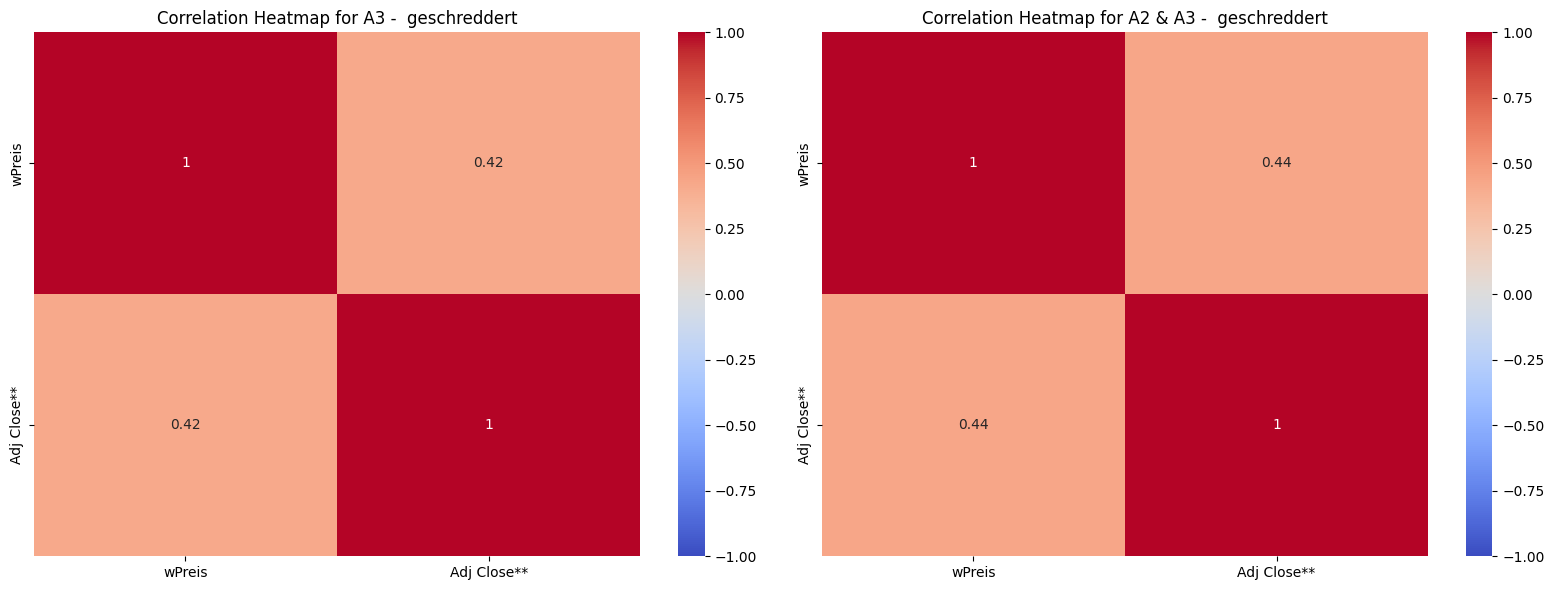

In [124]:
# Create a grid of subplots with a 2 by 1 layout
n_rows = 1
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6 * n_rows))

# Loop through each category and create a heatmap in the grid
for i, category in enumerate(categories):
    category_data = combined_gas[combined_gas['full'] == category]
    correlation_matrix = category_data[['wPreis', 'Adj Close**']].corr()

    # Plot the heatmap in the current subplot
    ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    ax.set_title(f'Correlation Heatmap for {category}')

# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

The correlation heatmap confirms that the correlation is less than that of oil and electricity.

#### Correlation for Gas with Lag
Start with 1-week lag

In [125]:
combined_gas['wPreis_lagged_week'] = combined_gas['wPreis'].shift(1)

In [127]:
# Get unique categories
categories = combined_gas['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = combined_df[combined_gas['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis_lagged_week'], mode='lines', name=f'wPreis_lagged_week ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close**'], mode='lines', name=f' Gas Adj Close** ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison (wPreis_lagged_week) with Gas Adj Close** by Category for the cluster [48,49]",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

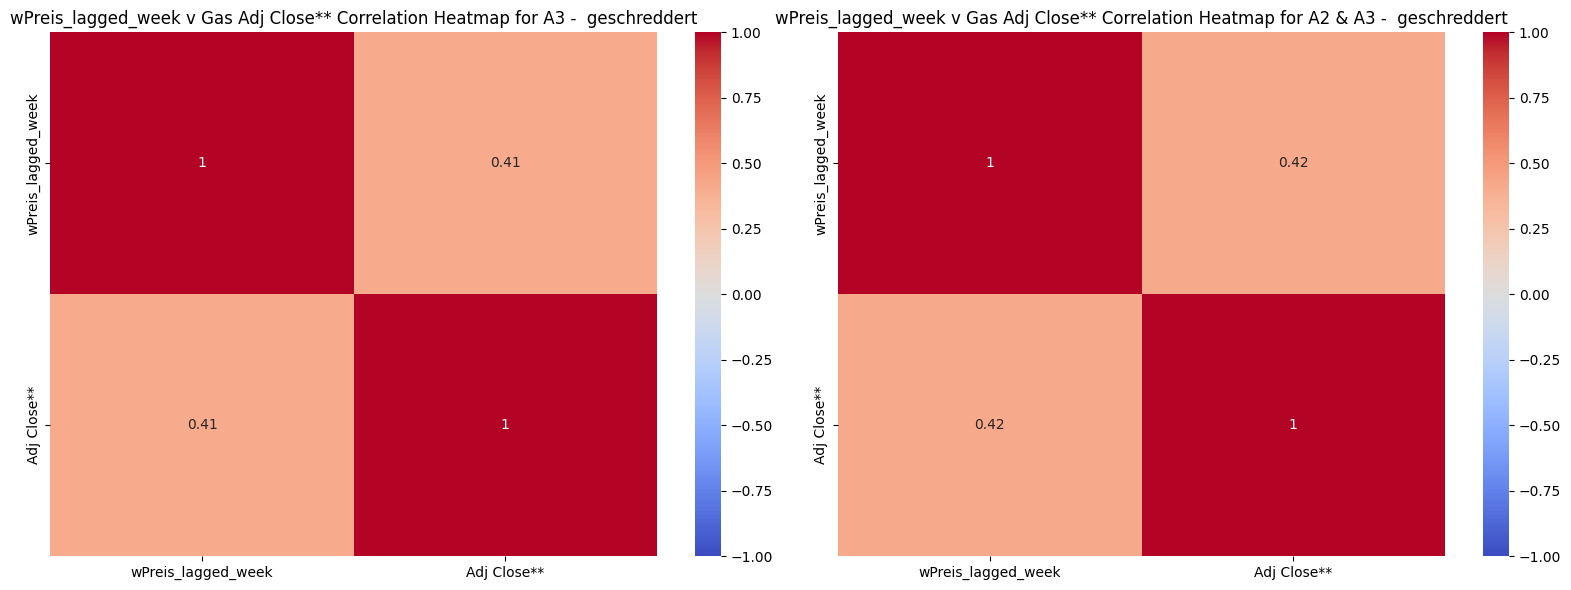

In [128]:
# Create a figure with heatmaps side by side
fig, axes = plt.subplots(1, len(categories), figsize=(16, 6))

# Loop through each category and create a heatmap
for i, category in enumerate(categories):
    category_data = combined_gas[combined_gas['full'] == category]
    
    # Create the correlation heatmap
    correlation_matrix = category_data[['wPreis_lagged_week', 'Adj Close**']].corr()
    ax_heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[i])
    ax_heatmap.set_title(f'wPreis_lagged_week v Gas Adj Close** Correlation Heatmap for {category}')
    
# Adjust layout spacing
plt.tight_layout()

# Show the subplots
plt.show()

In [129]:
# Loop through each category and calculate the correlation values
correlation_values = []
for category in categories:
    category_data = combined_gas[combined_gas['full'] == category]
    correlation_matrix = category_data[['wPreis_lagged_week', 'Adj Close**']].corr()
    correlation_value = correlation_matrix.iloc[0, 1]  # Get the correlation value between 'wPreis' and 'Adj Close**'
    correlation_values.append((category, correlation_value))

# Print the correlation values
for category, correlation in correlation_values:
    print(f'wPreis_lagged_week v Gas Adj Close** Correlation for {category}: {correlation:.2f}')

wPreis_lagged_week v Gas Adj Close** Correlation for A3 -  geschreddert: 0.41
wPreis_lagged_week v Gas Adj Close** Correlation for A2 & A3 -  geschreddert: 0.42


In [130]:
# Define the range of lags
lags = range(2, 11)

# Create an empty DataFrame to store the results
lag_correlations = pd.DataFrame(columns=['Category', 'Lag', 'Correlation'])

# Loop through each category and lag and calculate the correlation
for category in categories:
    for lag in lags:
        category_data = combined_gas[combined_gas['full'] == category]
        
        # Calculate the lagged variable
        category_data['wPreis_lagged'] = category_data['wPreis'].shift(lag)
        
        # Calculate the correlation between wPreis_lagged and Adj Close**
        correlation = category_data['wPreis_lagged'].corr(category_data['Adj Close**'])
        
        # Append the result to the DataFrame
        lag_correlations = lag_correlations.append({'Category': category, 'Lag': lag, 'Correlation': correlation}, ignore_index=True)

# Display the correlation coefficients for each category and lag
print(lag_correlations)

                   Category Lag  Correlation
0        A3 -  geschreddert   2     0.366615
1        A3 -  geschreddert   3     0.335369
2        A3 -  geschreddert   4     0.305022
3        A3 -  geschreddert   5     0.282620
4        A3 -  geschreddert   6     0.252529
5        A3 -  geschreddert   7     0.224812
6        A3 -  geschreddert   8     0.199308
7        A3 -  geschreddert   9     0.170856
8        A3 -  geschreddert  10     0.144504
9   A2 & A3 -  geschreddert   2     0.383909
10  A2 & A3 -  geschreddert   3     0.354544
11  A2 & A3 -  geschreddert   4     0.328363
12  A2 & A3 -  geschreddert   5     0.307950
13  A2 & A3 -  geschreddert   6     0.281432
14  A2 & A3 -  geschreddert   7     0.258252
15  A2 & A3 -  geschreddert   8     0.236976
16  A2 & A3 -  geschreddert   9     0.213898
17  A2 & A3 -  geschreddert  10     0.188337


Correlations for all the lags are less compared to that of oil.

### 2. Weather (Wind, Temp)

To get the weather data, first we need to find the center of each ***Postleitzahl***.
Here are the centers based on <https://academickids.com/encyclopedia/index.php/List_of_postal_codes_in_Germany> and <https://simple.wikipedia.org/wiki/Postal_codes_in_Germany>:

- 20: Hamburg (53.5507,9.993)
- 21: Hamburg (53.5507,9.993), Elbinsel Wilhelmsburg (53.5067,9.9871), Kirchdorf (52.5952,8.8349), Reinbek (53.517,10.2488), Buchholz in der Nordheide (53.3264,9.8681), Stade (53.5934,9.4763), Freiburg/Elbe (53.8236,9.2854), Balje (53.8333,9.1333)
- 22: Hamburg (53.5507,9.993)
- 23: Lübeck (53.8689,10.6873), Plön (54.1624,10.4233)
- 24: Kiel (54.3213,10.1349), Altenholz (54.4,10.1333), Gettorf (54.4,9.9833), Eckernförde (54.4685,9.8382), Neumünster (54.0748,9.9819), Henstedt-Ulzburg (53.7903,10.0054), Kaltenkirchen (53.8329,9.9581), Bad Bramstedt (53.9183,9.8842), Nortorf (54.1674,9.8544), Hohenwestedt (54.0889,9.6536), Boostedt (54.0167,10.0333), Trappenkamp (54.0399,10.215), Rendsburg (54.3066,9.6631), Büdelsdorf (54.3184,9.673), Flensburg (54.7843,9.4396)
- 25: Uetersen (53.6877,9.6639), Tornesch (53.7,9.7167), Moorrege (53.6667,9.6667), Heidgraben (53.7079,9.681), Groß Nordende (53.7,9.65), Neuendeich (53.6833,9.6167), Marne (54.35,8.7667), Husum (54.4858,9.0524) , Schwabstedt (54.3971,9.1865)
- 26: Bad Zwischenahn (53.1833,8), Wilhelmshaven (53.53,8.1125), Aurich (53.4692,7.4823), Apen (53.2167,7.8), Leer (53.2316,7.461), Moormerland (53.3114,7.423), Rhauderfehn (53.1333,7.6167), Hesel (53.3,7.6), Jemgum (53.2667,7.3833), Elsfleth (53.2375,8.4566)
- 27: Steinkirchen (53.566,9.6111), Hollern-Twielenfleth (53.5998,9.5522)
- 28: Bremen (53.0758,8.8072)


In [459]:
w_average_20212223 = pd.read_csv('w_average_20212223.csv')
#w_average_20212223.head()

In [460]:
fig = px.line(w_average_20212223, x='time', y='temperature_2m', title='Weekly Average temperature for [20,21,22,23]')
fig.show()

In [461]:
fig = px.line(w_average_20212223, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [20,21,22,23]')
fig.show()

In [462]:
w_average_2425 = pd.read_csv('w_average_2425.csv')
#w_average_2425.head()

In [463]:
fig = px.line(w_average_2425, x='time', y='temperature_2m', title='Weekly Average temperature for [24,25]')
fig.show()

In [464]:
fig = px.line(w_average_2425, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [24,25]')
fig.show()

In [465]:
w_average_262728 = pd.read_csv('w_average_262728.csv')
#w_average_262728.head()

In [466]:
fig = px.line(w_average_262728, x='time', y='temperature_2m', title='Weekly Average temperature for [26,27,28]')
fig.show()

In [467]:
fig = px.line(w_average_262728, x='time', y='windspeed_10m', title='Weekly Average Windspeed for [26,27,28]')
fig.show()

### Business Cycle (DAX)

For Business Cycles, a key indication that we are using is the **DAX**. The DAX also known as *the Deutscher Aktien Index* or *the GER40* is a stock index that represent 40 of the largest and most liquid German companies that trade on the Frankfurt Exchange.

From the dataset, we will now extract the 7th Cluster, ['1', '4', '6', '7', '8', '9'] and dig in to see if that cluster has any corelation woth the DAX.

#### Cluster [1, 4, 6, 7, 8, 9]

In [468]:
TS7 = df[(df['Plz'] == "['1', '4', '6', '7', '8', '9']")]  
fig = px.line(TS7, x='date', y='wPreis', color='full', title='Weekly Prices for [1, 4, 6, 7, 8, 9] by Category')
fig.show()

#### Cluster '48', '49'

In [469]:
TS5 = df[(df['Plz'] == "['48', '49']")]  
fig = px.line(TS5, x='date', y='wPreis', color='full', title='Weekly Prices for [48, 49] by Category')
fig.show()

In [470]:
dax_df = pd.read_csv('DAX.csv')
#dax_df.head()
#dax_df.info()

In [471]:
dax_df["Date"] =pd.to_datetime(dax_df["Date"])
#dax_df.info()

In [472]:
dax_fig = px.line(dax_df, x='Date', y='Adj Close', title='Adj Close prices for DAX')
dax_fig.show()

Visually from the plot we can see that the adj close has a ver small range within the given time frame.

Now I want to extract the year and week number as per the original time series and drop the columns i dont need

In [473]:
dax_df['Year_week'] = dax_df['Date'].dt.strftime('%G-%V')
#dax_df.head(10)

In [474]:
dax_fig = px.scatter(dax_df, x='Year_week', y='Adj Close', title='Adj Close prices for DAX')
dax_fig.show()

In [475]:
#dax_df.set_index('Date', inplace=True)
weekly_avg = dax_df.resample('W', on='Date').mean()
#dax_df['Weekly_avg'] = dax_df.groupby('Year_week')['Adj Close'].mean()
#weekly_avg

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/3706355420.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [476]:
dax_df = dax_df[['Date', 'Adj Close', 'Year_week', ]]
#dax_df.head()

In [477]:
dax_TS7 = pd.merge(TS7[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
dax_TS5 = pd.merge(TS5[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
dax_TS1 = pd.merge(TS1[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
#dax_TS5.head()


Let now visualize the weekly price and the DAX over the same time period to see if there is any visual corelation

In [478]:

trace1 = go.Scatter(x=dax_TS7['date'], y=dax_TS7['wPreis'], mode='lines', name='Weekly Prices')
trace2 = go.Scatter(x=dax_TS7['date'], y=dax_TS7['Adj Close'], mode='lines', name='Adj Close')

data = [trace1, trace2]

layout = go.Layout(
    title='Time Series Comparison by Category for the cluster [1, 4, 6, 7, 8, 9] andthe daily DAX',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [479]:
# Get unique categories
categories = dax_TS5['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = dax_TS5[dax_TS5['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close'], mode='lines', name=f'Adj Close ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49] and DAX",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

In [480]:
# Get unique categories
categories = dax_TS1['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = dax_TS1[dax_TS1['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close'], mode='lines', name='Adj Close '))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [25,24] and DAX",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

**Correlation**

From this plot, we can't really see a significant corelation, only a small negative corelation at some point when you zoom in. Let'scompute the actuall corelation 

In [481]:
correlation_df = pd.DataFrame(columns=['Category', 'Correlation', 'Clujster'])

# Calculate the correlation for each category
for category in dax_TS1['full'].unique():
    category_data = dax_TS1[dax_TS1['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '25,24'}, ignore_index=True)

for category in dax_TS5['full'].unique():
    category_data = dax_TS5[dax_TS5['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '48,49'}, ignore_index=True)

for category in dax_TS7['full'].unique():
    category_data = dax_TS7[dax_TS7['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '1, 4, 6, 7, 8, 9'}, ignore_index=True)

# Display the correlation DataFrame
print(correlation_df)

                  Category  Correlation          Clujster
0       A2 -  geschreddert    -0.742500             25,24
1  A1 & A2 -  geschreddert    -0.718484             25,24
2  A2 & A3 -  geschreddert    -0.737670             25,24
3       A3 -  geschreddert    -0.660702             48,49
4  A2 & A3 -  geschreddert    -0.687785             48,49
5  A1 & A2 -  geschreddert    -0.449363  1, 4, 6, 7, 8, 9


/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_98908/135459294.py:12: FutureWarning:

The frame.append method is deprecated

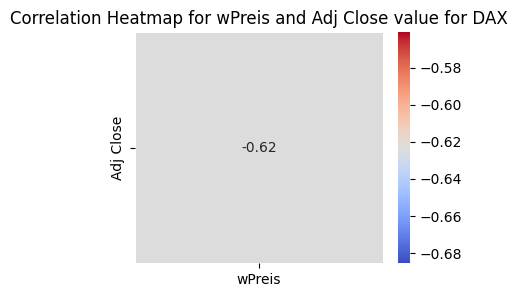

In [482]:
correlation = dax_TS7['wPreis'].corr(dax_TS5['Adj Close'])

plt.figure(figsize=(4, 3))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=['wPreis'], yticklabels=['Adj Close'])
plt.title('Correlation Heatmap for wPreis and Adj Close value for DAX')
plt.show()

Since there isn't any significant corelation on th *wPreis* and the *daily Close* value for the **DAX**

We will now lag the daily wPreis by a week and see if I will find a more or less significant corelation between the lagged wPreis and the DAX.

In [483]:
dax_price_df_lag = dax_TS7
dax_price_df_lag['wPreis_lagged_week'] = dax_price_df_lag['wPreis'].shift(1)

In [484]:

trace1 = go.Scatter(x=dax_price_df_lag['date'], y=dax_price_df_lag['wPreis_lagged_week'], mode='lines', name='Weekly Prices lagged')
trace2 = go.Scatter(x=dax_price_df_lag['date'], y=dax_price_df_lag['Adj Close'], mode='lines', name='Adj Close')

data = [trace1, trace2]

layout = go.Layout(
    title='Weekly Prices for [1, 4, 6, 7, 8, 9] Cluster vs the daily DAX',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


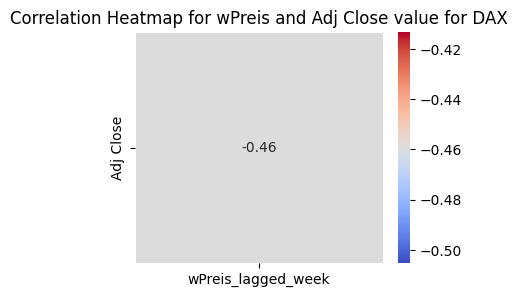

In [485]:
correlation = dax_price_df_lag['wPreis_lagged_week'].corr(dax_price_df_lag['Adj Close'])

plt.figure(figsize=(4, 3))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=['wPreis_lagged_week'], yticklabels=['Adj Close'])
plt.title('Correlation Heatmap for wPreis and Adj Close value for DAX')
plt.show()

At this point, we cannot deduce any strong corelation between Weekly prices(for product category A1 & A2) and the DAX.

### Construction

The next cell is about importing the data on construction permits number (per land per month). It is taken from Statistik der Baugenehmigungen (code 31111) placed on https://www-genesis.destatis.de/. This variable was taken because it was the only one available with monthly frequency and per land.
The Construction.xlsx file has been created MANUALLY using the table formed by the website.

In [7]:
#reading the df
baudf = pd.read_excel('Construction.xlsx').reset_index(drop=True)

#creating a months column
months = {
    'Januar': 1,
    'Februar': 2,
    'März': 3,
    'April': 4,
    'Mai': 5,
    'Juni': 6,
    'Juli': 7,
    'August': 8,
    'September': 9,
    'Oktober': 10,
    'November': 11,
    'Dezember': 12  
}
baudf['Month_number']=baudf['Month'].apply(lambda x: months[x])

#creating a week (YYYY-WW) column
baudf['Datetime']=(baudf['Year'].apply(str)+'-'+baudf['Month_number'].apply(str)+'-'+'28').apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))#.dt.isocalendar().week

#dropping redundant columns
baudf = baudf[['Land', 'Datetime', 'Value']]

In [8]:
needed_columns = ['week', 'wPreis', 'full']

#relating the PLZs to the lands (because the constructo ndata is split by lands)
NS_HB = df[df['Plz']=="['26', '27', '28']"][needed_columns]
NS = df[df['Plz']=="['29', '30', '31', '38', '39']"][needed_columns]
Sach = df[df['Plz']=="['1', '4', '6', '7', '8', '9']"][needed_columns]

#adding a datetime column and dropping the week column
lander_dfs = [NS_HB,  NS, Sach]
for land_df in lander_dfs:
    land_df.loc[:,'Datetime'] = land_df.week.apply(lambda x: datetime.datetime.strptime(x+'-3', "%Y-%W-%w"))
    land_df.drop('week', inplace = True, axis=1)

In [9]:
#introduction of the functions to be used

def cutting_dfs(waste_price_df, construction_df):
    """Cuts the waste_price_df and construction_df so that their time series overlap and have the same length"""
    
    #reseting the indexes
    waste_price_df.reset_index(inplace=True, drop=True)
    construction_df.reset_index(inplace=True, drop=True)
   
    #getting and applying the window where the timeseries overlap
    earliest_date = waste_price_df.Datetime[0]
    latest_date = construction_df.Datetime.iloc[-6]
    waste_price_df = waste_price_df[(waste_price_df['Datetime']>=earliest_date)&(waste_price_df['Datetime']<=latest_date)]
    construction_df = construction_df[(construction_df['Datetime']>=earliest_date)&(construction_df['Datetime']<=latest_date)]
    construction_df.loc[:, 'Value'] = construction_df['Value'].astype('float32')

    return [waste_price_df, construction_df]

def same_length(waste_price_df, construction_df):
    """Forces the relevant timeseries to be of the same length"""

    #getting the month and year colums for waste_price_df
    waste_price_df.loc[:, 'Month'] = waste_price_df['Datetime'].apply(lambda x: x.month)
    waste_price_df.loc[:, 'Year'] = waste_price_df['Datetime'].apply(lambda x: x.year)
    #averaging the waste_price_df values by months and years
    waste_price_df = waste_price_df.groupby(['Month', 'Year', 'full']).mean().reset_index().sort_values(['full', 'Year', 'Month']).reset_index(drop=True)
    
    #sorting the average values by the waste type and creating a list of 
    if waste_price_df['full'].nunique()>1:
        waste_type_dfs = [waste_price_df[waste_price_df['full']==unique] for unique in waste_price_df['full'].unique()]
    else:
        waste_type_dfs = [waste_price_df]
       
    #considering a case when the waste_price_df has a row missing (Ber_Bra misses December'22)
    if waste_type_dfs[0].shape[0] != construction_df.shape[0]:
        #print(construction_df)
        construction_df.drop(index = 35, inplace=True)
      
    return [waste_type_dfs, construction_df]

def correlation(waste_type_dfs, construction_df):
    """Computes the correlation coefficients and prints them nicely"""
    for waste_type_df in waste_type_dfs:
        cc = waste_type_df['wPreis'].reset_index(drop=True).corr(construction_df['Value'].reset_index(drop=True), method='spearman')
        print(f'Corr. coeff. between the {waste_type_df.full.unique()[0]} prices and the number of construction permits issues is', round(cc, 2))

def compute_correlation(waste_price_df, construction_df):
    """Combines the above functions"""
    cut_dfs =  cutting_dfs(waste_price_df, construction_df)
    same_length_dfs = same_length(cut_dfs[0], cut_dfs[1])   
    waste_type_dfs, construction_df = same_length_dfs[0], same_length_dfs[1]
    correlation(waste_type_dfs, construction_df)

In [10]:
#massive plotting here
#first we define the lands corresponding to each of the PLZ sets
#the order is just as that of lander_df
land_names = [['Niedersachsen', 'Bremen'], 'Niedersachsen', 'Sachsen']

#we will plot on by-land basis
for land_df, land_name in zip(lander_dfs, land_names):
    #merging the construction permits numbers if more than one land involved and filtering the data
    if len(land_name)==2:
        construction_df = baudf[baudf['Land'] ==land_name[0]].merge(baudf[baudf['Land'] ==land_name[1]], on='Datetime', how='outer') 
        construction_df['Value'] = construction_df['Value_x'] + construction_df['Value_y']
        construction_df = construction_df[['Datetime','Value']]
    #or just filtering the data if there is the only land involved
    else: 
        construction_df = baudf[baudf['Land'] == land_name]
        construction_df = construction_df[['Datetime','Value']]
    
    #here come plots of actual prices vs number of permits
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
    #plot all types of waste for the given land
    for waste_type in land_df.full.unique():
        fig.append_trace(
            go.Scatter(x=land_df[land_df['full']==waste_type]['Datetime'], y=land_df[land_df['full']==waste_type]['wPreis'], 
                       name=f"{waste_type}"),
            row=1, col=1
        )
    #adding the plot for the construction permits in the land(s)
    fig.append_trace(
            go.Scatter(x=construction_df['Datetime'], y=construction_df['Value'], name="Construction Permits Issued"),
            row=2, col=1
        )
    #wrapping up
    fig.update_layout(title_text=f"Waste Prices in {land_name}")
    fig.show()

    #data on correlation of the above lines
    compute_correlation(land_df, construction_df)

Corr. coeff. between the A2 & A3 -  geschreddert prices and the number of construction permits issues is -0.75
Corr. coeff. between the A3 -  geschreddert prices and the number of construction permits issues is -0.73


Corr. coeff. between the A1 & A2 -  geschreddert prices and the number of construction permits issues is -0.79
Corr. coeff. between the A2 & A3 -  geschreddert prices and the number of construction permits issues is -0.78
Corr. coeff. between the A2 -  geschreddert prices and the number of construction permits issues is -0.78


Corr. coeff. between the A1 & A2 -  geschreddert prices and the number of construction permits issues is -0.82


Overall insight is that the pattern of correlations is the same. The correlation between actual waste prices and number of permits is large and negative. We assume it has something to do with the waste offer: usually the timespan between getting a construction permit and starting the construction itself is forced to be as short as possible => construction works start as soon as the permit is obtained => the waste is produced immediately => there is more waste offered on the market => the price decreases.

The rest of the analysis is available on Construction.ipynb notebook (including lags, differences etc.)